In [36]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc90/BHOSS_CODE"
data = "Rh80_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A93_124.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9288.189770 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 0.0 0.00153517
Total flux = 2.032902 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9077.464542 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.000667849
Total flux = 1.691762 Jy at 230 GHz
166:20:25.430 - Start Program


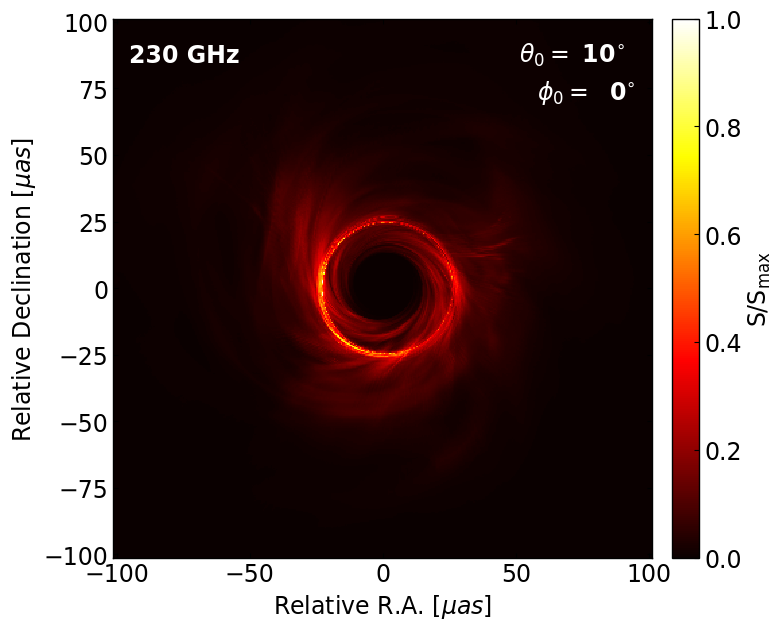

In [8]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [1]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==20) | (Rhigh==40) | (Rhigh==80) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [2]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 10, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc10/BHOSS_CODE
96, flux: 2.185490 at 9008.139053
97, flux: 2.234866 at 9017.844868
98, flux: 2.241800 at 9027.551100
99, flux: 2.246538 at 9038.646851
100, flux: 2.236512 at 9048.356431
101, flux: 2.223379 at 9058.061637
102, flux: 2.185488 at 9067.764826
103, flux: 2.146080 at 9077.464542
104, flux: 2.200538 at 9088.552963
105, flux: 2.175785 at 9098.254801
106, flux: 2.138224 at 9107.957635
107, flux: 2.148658 at 9117.659184
108, flux: 2.117877 at 9127.363548
109, flux: 2.099316 at 9138.452062
110, flux: 2.101998 at 9148.158890
111, flux: 2.075938 at 9157.868704
112, flux: 2.012369 at 9167.579583
113, flux: 1.943945 at 9178.672003
114, flux: 1.933812 at 9188.377169
115, flux: 1.983451 at 9198.079088
116, flux: 2.082163 at 9207.781556
117, flux: 2.119865 at 9217.482565
118, flux: 2.164761 at 9228.573654
119, flux: 2.220476 at 9238.281441
120, flux: 2.280806 at 9247.990304
121, flux: 2.261453 at 9257.698128
122, flux

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.073320 Jy, the density scale = 2.370000e-18


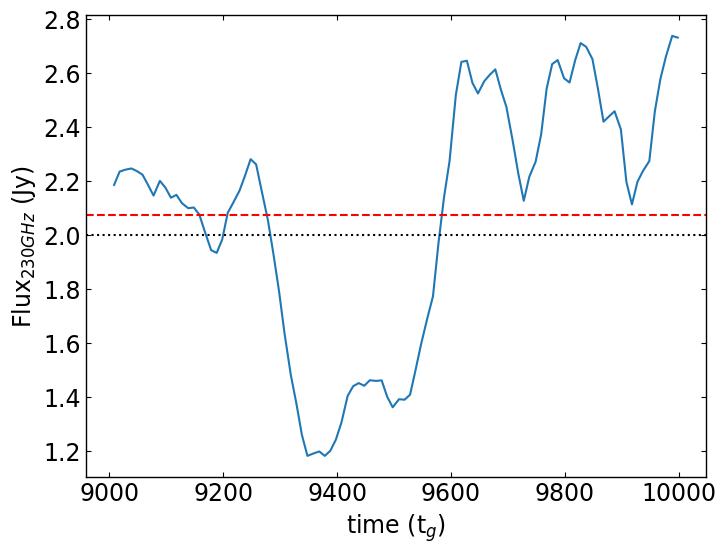

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.185490 Jy at 9008.139053
97:: 2.234866 Jy at 9017.844868
98:: 2.241800 Jy at 9027.551100
99:: 2.246538 Jy at 9038.646851
100:: 2.236512 Jy at 9048.356431
101:: 2.223379 Jy at 9058.061637
102:: 2.185488 Jy at 9067.764826
103:: 2.146080 Jy at 9077.464542
104:: 2.200538 Jy at 9088.552963
105:: 2.175785 Jy at 9098.254801
106:: 2.138224 Jy at 9107.957635
107:: 2.148658 Jy at 9117.659184
108:: 2.117877 Jy at 9127.363548
109:: 2.099316 Jy at 9138.452062
110:: 2.101998 Jy at 9148.158890
111:: 2.075938 Jy at 9157.868704
112:: 2.012369 Jy at 9167.579583
113:: 1.943945 Jy at 9178.672003
114:: 1.933812 Jy at 9188.377169
115:: 1.983451 Jy at 9198.079088
116:: 2.082163 Jy at 9207.781556
117:: 2.119865 Jy at 9217.482565
118:: 2.164761 Jy at 9228.573654
119:: 2.220476 Jy at 9238.281441
120:: 2.280806 Jy at 9247.990304
121:: 2.261453 Jy at 9257.698128
122:: 2.163767 Jy at 9267.401850
123:: 2.054032 Jy at 9278.487308
124:: 1.928281 Jy at 9288.189770
125:: 1.792431 Jy at 9297.894634
126:: 1.635402

In [37]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 30, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc30/BHOSS_CODE
96, flux: 2.174357 at 9008.139053
97, flux: 2.218223 at 9017.844868
98, flux: 2.234281 at 9027.551100
99, flux: 2.239007 at 9038.646851
100, flux: 2.222544 at 9048.356431
101, flux: 2.217584 at 9058.061637
102, flux: 2.177889 at 9067.764826
103, flux: 2.139968 at 9077.464542
104, flux: 2.198889 at 9088.552963
105, flux: 2.182814 at 9098.254801
106, flux: 2.149737 at 9107.957635
107, flux: 2.166743 at 9117.659184
108, flux: 2.142854 at 9127.363548
109, flux: 2.134592 at 9138.452062
110, flux: 2.137590 at 9148.158890
111, flux: 2.091044 at 9157.868704
112, flux: 2.035993 at 9167.579583
113, flux: 1.984293 at 9178.672003
114, flux: 2.017175 at 9188.377169
115, flux: 2.021619 at 9198.079088
116, flux: 2.084653 at 9207.781556
117, flux: 2.106738 at 9217.482565
118, flux: 2.168075 at 9228.573654
119, flux: 2.231076 at 9238.281441
120, flux: 2.279238 at 9247.990304
121, flux: 2.265623 at 9257.698128
122, flux

In [38]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [39]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.983459 Jy, the density scale = 2.280000e-18


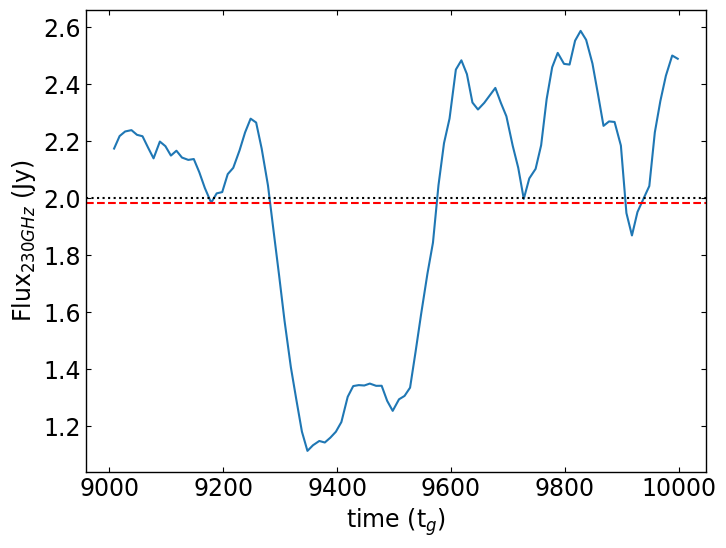

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [41]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.174357 Jy at 9008.139053
97:: 2.218223 Jy at 9017.844868
98:: 2.234281 Jy at 9027.551100
99:: 2.239007 Jy at 9038.646851
100:: 2.222544 Jy at 9048.356431
101:: 2.217584 Jy at 9058.061637
102:: 2.177889 Jy at 9067.764826
103:: 2.139968 Jy at 9077.464542
104:: 2.198889 Jy at 9088.552963
105:: 2.182814 Jy at 9098.254801
106:: 2.149737 Jy at 9107.957635
107:: 2.166743 Jy at 9117.659184
108:: 2.142854 Jy at 9127.363548
109:: 2.134592 Jy at 9138.452062
110:: 2.137590 Jy at 9148.158890
111:: 2.091044 Jy at 9157.868704
112:: 2.035993 Jy at 9167.579583
113:: 1.984293 Jy at 9178.672003
114:: 2.017175 Jy at 9188.377169
115:: 2.021619 Jy at 9198.079088
116:: 2.084653 Jy at 9207.781556
117:: 2.106738 Jy at 9217.482565
118:: 2.168075 Jy at 9228.573654
119:: 2.231076 Jy at 9238.281441
120:: 2.279238 Jy at 9247.990304
121:: 2.265623 Jy at 9257.698128
122:: 2.174337 Jy at 9267.401850
123:: 2.044970 Jy at 9278.487308
124:: 1.887420 Jy at 9288.189770
125:: 1.731817 Jy at 9297.894634
126:: 1.569926

In [42]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 50, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc50/BHOSS_CODE
96, flux: 2.271502 at 9008.139053
97, flux: 2.297067 at 9017.844868
98, flux: 2.312725 at 9027.551100
99, flux: 2.310803 at 9038.646851
100, flux: 2.296661 at 9048.356431
101, flux: 2.302387 at 9058.061637
102, flux: 2.273385 at 9067.764826
103, flux: 2.242387 at 9077.464542
104, flux: 2.343810 at 9088.552963
105, flux: 2.368439 at 9098.254801
106, flux: 2.340304 at 9107.957635
107, flux: 2.352711 at 9117.659184
108, flux: 2.346929 at 9127.363548
109, flux: 2.330252 at 9138.452062
110, flux: 2.328749 at 9148.158890
111, flux: 2.231716 at 9157.868704
112, flux: 2.191852 at 9167.579583
113, flux: 2.170426 at 9178.672003
114, flux: 2.174878 at 9188.377169
115, flux: 2.101118 at 9198.079088
116, flux: 2.146537 at 9207.781556
117, flux: 2.185520 at 9217.482565
118, flux: 2.268532 at 9228.573654
119, flux: 2.360288 at 9238.281441
120, flux: 2.421823 at 9247.990304
121, flux: 2.418310 at 9257.698128
122, flux

In [43]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [44]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.024834 Jy, the density scale = 2.250000e-18


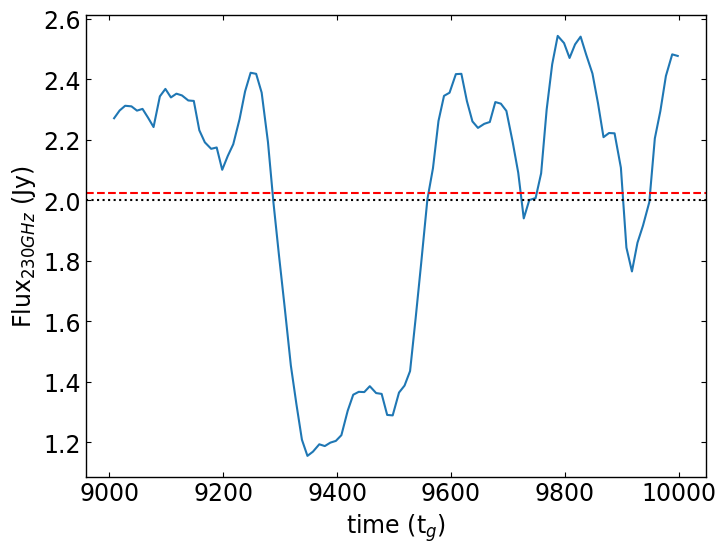

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [46]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.271502 Jy at 9008.139053
97:: 2.297067 Jy at 9017.844868
98:: 2.312725 Jy at 9027.551100
99:: 2.310803 Jy at 9038.646851
100:: 2.296661 Jy at 9048.356431
101:: 2.302387 Jy at 9058.061637
102:: 2.273385 Jy at 9067.764826
103:: 2.242387 Jy at 9077.464542
104:: 2.343810 Jy at 9088.552963
105:: 2.368439 Jy at 9098.254801
106:: 2.340304 Jy at 9107.957635
107:: 2.352711 Jy at 9117.659184
108:: 2.346929 Jy at 9127.363548
109:: 2.330252 Jy at 9138.452062
110:: 2.328749 Jy at 9148.158890
111:: 2.231716 Jy at 9157.868704
112:: 2.191852 Jy at 9167.579583
113:: 2.170426 Jy at 9178.672003
114:: 2.174878 Jy at 9188.377169
115:: 2.101118 Jy at 9198.079088
116:: 2.146537 Jy at 9207.781556
117:: 2.185520 Jy at 9217.482565
118:: 2.268532 Jy at 9228.573654
119:: 2.360288 Jy at 9238.281441
120:: 2.421823 Jy at 9247.990304
121:: 2.418310 Jy at 9257.698128
122:: 2.356102 Jy at 9267.401850
123:: 2.192361 Jy at 9278.487308
124:: 1.991302 Jy at 9288.189770
125:: 1.816988 Jy at 9297.894634
126:: 1.650816

In [47]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 70, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc70/BHOSS_CODE
96, flux: 2.341440 at 9008.139053
97, flux: 2.341241 at 9017.844868
98, flux: 2.327588 at 9027.551100
99, flux: 2.317573 at 9038.646851
100, flux: 2.298525 at 9048.356431
101, flux: 2.293354 at 9058.061637
102, flux: 2.285105 at 9067.764826
103, flux: 2.271217 at 9077.464542
104, flux: 2.418022 at 9088.552963
105, flux: 2.471829 at 9098.254801
106, flux: 2.474827 at 9107.957635
107, flux: 2.490442 at 9117.659184
108, flux: 2.462110 at 9127.363548
109, flux: 2.463299 at 9138.452062
110, flux: 2.444834 at 9148.158890
111, flux: 2.377549 at 9157.868704
112, flux: 2.292371 at 9167.579583
113, flux: 2.198521 at 9178.672003
114, flux: 2.208538 at 9188.377169
115, flux: 2.155451 at 9198.079088
116, flux: 2.242922 at 9207.781556
117, flux: 2.302498 at 9217.482565
118, flux: 2.476978 at 9228.573654
119, flux: 2.584157 at 9238.281441
120, flux: 2.622488 at 9247.990304
121, flux: 2.669228 at 9257.698128
122, flux

In [48]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [49]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.046247 Jy, the density scale = 2.210000e-18


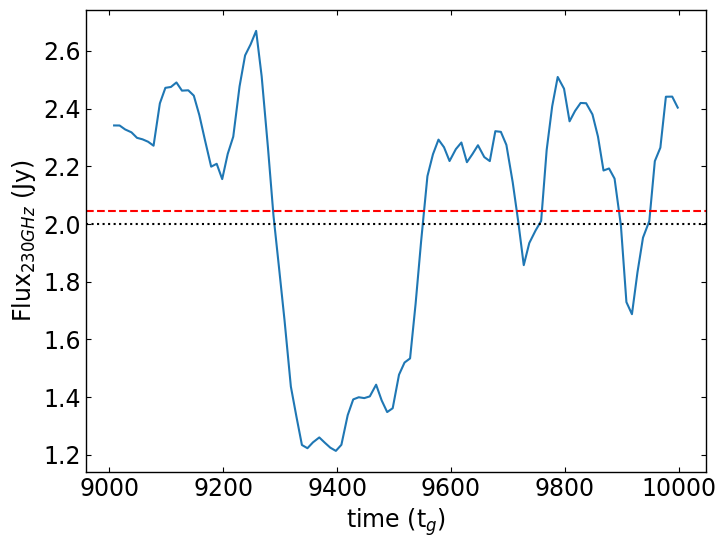

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [51]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.341440 Jy at 9008.139053
97:: 2.341241 Jy at 9017.844868
98:: 2.327588 Jy at 9027.551100
99:: 2.317573 Jy at 9038.646851
100:: 2.298525 Jy at 9048.356431
101:: 2.293354 Jy at 9058.061637
102:: 2.285105 Jy at 9067.764826
103:: 2.271217 Jy at 9077.464542
104:: 2.418022 Jy at 9088.552963
105:: 2.471829 Jy at 9098.254801
106:: 2.474827 Jy at 9107.957635
107:: 2.490442 Jy at 9117.659184
108:: 2.462110 Jy at 9127.363548
109:: 2.463299 Jy at 9138.452062
110:: 2.444834 Jy at 9148.158890
111:: 2.377549 Jy at 9157.868704
112:: 2.292371 Jy at 9167.579583
113:: 2.198521 Jy at 9178.672003
114:: 2.208538 Jy at 9188.377169
115:: 2.155451 Jy at 9198.079088
116:: 2.242922 Jy at 9207.781556
117:: 2.302498 Jy at 9217.482565
118:: 2.476978 Jy at 9228.573654
119:: 2.584157 Jy at 9238.281441
120:: 2.622488 Jy at 9247.990304
121:: 2.669228 Jy at 9257.698128
122:: 2.511782 Jy at 9267.401850
123:: 2.264007 Jy at 9278.487308
124:: 2.028454 Jy at 9288.189770
125:: 1.848336 Jy at 9297.894634
126:: 1.665647

In [52]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 90, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc90/BHOSS_CODE
96, flux: 2.449673 at 9008.139053
97, flux: 2.391910 at 9017.844868
98, flux: 2.354278 at 9027.551100
99, flux: 2.317279 at 9038.646851
100, flux: 2.269536 at 9048.356431
101, flux: 2.208847 at 9058.061637
102, flux: 2.181735 at 9067.764826
103, flux: 2.174166 at 9077.464542
104, flux: 2.312149 at 9088.552963
105, flux: 2.390325 at 9098.254801
106, flux: 2.427150 at 9107.957635
107, flux: 2.483195 at 9117.659184
108, flux: 2.497671 at 9127.363548
109, flux: 2.489744 at 9138.452062
110, flux: 2.458763 at 9148.158890
111, flux: 2.388649 at 9157.868704
112, flux: 2.274268 at 9167.579583
113, flux: 2.248917 at 9178.672003
114, flux: 2.222632 at 9188.377169
115, flux: 2.222016 at 9198.079088
116, flux: 2.353334 at 9207.781556
117, flux: 2.398114 at 9217.482565
118, flux: 2.465450 at 9228.573654
119, flux: 2.567200 at 9238.281441
120, flux: 2.609727 at 9247.990304
121, flux: 2.620292 at 9257.698128
122, flux

In [53]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [54]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.033935 Jy, the density scale = 2.180000e-18


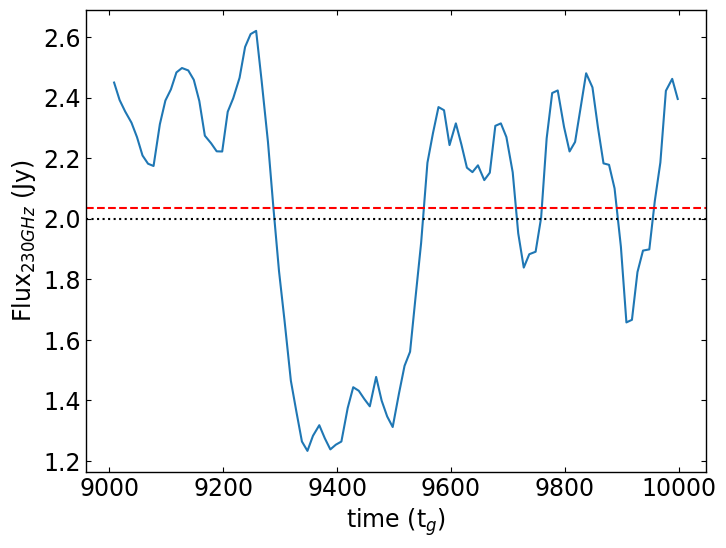

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [56]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.449673 Jy at 9008.139053
97:: 2.391910 Jy at 9017.844868
98:: 2.354278 Jy at 9027.551100
99:: 2.317279 Jy at 9038.646851
100:: 2.269536 Jy at 9048.356431
101:: 2.208847 Jy at 9058.061637
102:: 2.181735 Jy at 9067.764826
103:: 2.174166 Jy at 9077.464542
104:: 2.312149 Jy at 9088.552963
105:: 2.390325 Jy at 9098.254801
106:: 2.427150 Jy at 9107.957635
107:: 2.483195 Jy at 9117.659184
108:: 2.497671 Jy at 9127.363548
109:: 2.489744 Jy at 9138.452062
110:: 2.458763 Jy at 9148.158890
111:: 2.388649 Jy at 9157.868704
112:: 2.274268 Jy at 9167.579583
113:: 2.248917 Jy at 9178.672003
114:: 2.222632 Jy at 9188.377169
115:: 2.222016 Jy at 9198.079088
116:: 2.353334 Jy at 9207.781556
117:: 2.398114 Jy at 9217.482565
118:: 2.465450 Jy at 9228.573654
119:: 2.567200 Jy at 9238.281441
120:: 2.609727 Jy at 9247.990304
121:: 2.620292 Jy at 9257.698128
122:: 2.454240 Jy at 9267.401850
123:: 2.253257 Jy at 9278.487308
124:: 2.032902 Jy at 9288.189770
125:: 1.826768 Jy at 9297.894634
126:: 1.663352